In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/food52_scraped_data.csv')

In [3]:
df.head()

,_id,rating,recipe,title,weblink
0,59d7cf29a980892888190548,14,2 tablespoons unsalted butter\n1/4 cup diced y...,Austin Diner-Style Queso,https://food52.com/recipes/73529-austin-diner-...
1,59d7cf30a98089288819054a,29,1 pound shelled raw peanuts\n1 tablespoon plus...,Mamba (Spicy Haitian Peanut Butter),https://food52.com/recipes/73211-mamba-spicy-h...
2,59d7cf39a98089288819054c,2,2 cups (8 1/2 ounces) all-purpose flour\n1/2 c...,Sheet Pan Muffins,https://food52.com/recipes/73548-sheet-pan-muf...
3,59d7cf3fa98089288819054e,92,"1 1/2 cups (300g) Puy lentils, washed\n4 clove...",Anna Jones' Favorite Lentils with Roasted Toma...,https://food52.com/recipes/73511-anna-jones-fa...
4,59d7cf48a980892888190550,3,2 ounces Seedlip Garden 108\n0.75 ounces Lemon...,Seedlip's A Good Dill,https://food52.com/recipes/73252-seedlip-s-a-g...


In [4]:
len(df['rating'].where(df['rating'] == 0))

9721

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9721 entries, 0 to 9720
Data columns (total 5 columns):
_id        9721 non-null object
rating     9721 non-null int64
recipe     9233 non-null object
title      9721 non-null object
weblink    9721 non-null object
dtypes: int64(1), object(4)
memory usage: 379.8+ KB


In [6]:
import numpy as np
import string

In [7]:
def main_ingredient(col):
    ingredients = ['pork', 'chicken', 'beef']
    for item in ingredients:
        if item in str(col):
            return item
        else:
            continue

In [8]:
df['category'] = df['recipe'].apply(main_ingredient)

In [9]:
df['category'].value_counts()

chicken    2137
pork        696
beef        625
Name: category, dtype: int64

In [10]:
dummies = pd.get_dummies(df['category'])

In [11]:
dummies.head()

,beef,chicken,pork
0,0,0,0
1,0,0,0
2,0,0,0
3,1,0,0
4,0,0,0


In [12]:
df2 = pd.concat([df,dummies], axis=1)

In [13]:
df2.head()

,_id,rating,recipe,title,weblink,category,beef,chicken,pork
0,59d7cf29a980892888190548,14,2 tablespoons unsalted butter\n1/4 cup diced y...,Austin Diner-Style Queso,https://food52.com/recipes/73529-austin-diner-...,None,0,0,0
1,59d7cf30a98089288819054a,29,1 pound shelled raw peanuts\n1 tablespoon plus...,Mamba (Spicy Haitian Peanut Butter),https://food52.com/recipes/73211-mamba-spicy-h...,None,0,0,0
2,59d7cf39a98089288819054c,2,2 cups (8 1/2 ounces) all-purpose flour\n1/2 c...,Sheet Pan Muffins,https://food52.com/recipes/73548-sheet-pan-muf...,None,0,0,0
3,59d7cf3fa98089288819054e,92,"1 1/2 cups (300g) Puy lentils, washed\n4 clove...",Anna Jones' Favorite Lentils with Roasted Toma...,https://food52.com/recipes/73511-anna-jones-fa...,beef,1,0,0
4,59d7cf48a980892888190550,3,2 ounces Seedlip Garden 108\n0.75 ounces Lemon...,Seedlip's A Good Dill,https://food52.com/recipes/73252-seedlip-s-a-g...,None,0,0,0


In [14]:
del df2['_id']

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9721 entries, 0 to 9720
Data columns (total 8 columns):
rating      9721 non-null int64
recipe      9233 non-null object
title       9721 non-null object
weblink     9721 non-null object
category    3458 non-null object
beef        9721 non-null uint8
chicken     9721 non-null uint8
pork        9721 non-null uint8
dtypes: int64(1), object(4), uint8(3)
memory usage: 408.3+ KB


In [16]:
df2.dropna(axis=0, subset=['recipe'], inplace=True)

In [208]:
# df2['vegetarian'] = df2['category'].isnull()

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
from sklearn.decomposition import NMF

## topic extraction from recipe title

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [34]:
def label(col):
    if col <= 10:
        return True
    if col != 0:
        return False
    
df2['label'] = df2['rating'].apply(label)

In [35]:
X_recipe_text = df2['recipe'].values

In [36]:
tfidf_vectorizer = TfidfVectorizer()

In [37]:
tfidf2 = tfidf_vectorizer.fit_transform(X_recipe_text)

In [38]:
y = df2['label'].values

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(tfidf2, y, test_size=0.33, random_state=42)

In [41]:
mnb = MultinomialNB()

In [42]:
mnb_mod = mnb.fit(X_train, y_train)

In [43]:
mnb_mod.score(X_test, y_test)

0.7036429274696423

In [44]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, mnb_mod.predict_proba(X_test)[:, 0])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.21


In [51]:
X = df2['title']

In [52]:
tfidf_vectorizer2 = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [57]:
tfidf = tfidf_vectorizer.fit_transform(X)

In [58]:
nmf = NMF(n_components=8, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)

In [59]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [61]:
nmf_w = nmf.fit_transform(tfidf)
nmf_h = nmf.components_

In [62]:
df2['topic_labels'] = nmf_w.argmax(axis=1) # this was the right code to get labels/clusters

In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9714
Data columns (total 10 columns):
rating          9233 non-null int64
recipe          9233 non-null object
title           9233 non-null object
weblink         9233 non-null object
category        3458 non-null object
beef            9233 non-null uint8
chicken         9233 non-null uint8
pork            9233 non-null uint8
label           9233 non-null bool
topic_labels    9233 non-null int64
dtypes: bool(1), int64(2), object(4), uint8(3)
memory usage: 541.0+ KB


In [171]:
print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words=5)


Topics in NMF model (Frobenius norm):
Topic #0: and with sausage sweet cheese
Topic #1: chicken roast fried lemon curry
Topic #2: salad dressing summer vinaigrette potato
Topic #3: soup noodle lentil bean mushroom
Topic #4: pork sauce tenderloin chops pulled
Topic #5: roasted garlic cauliflower potatoes squash
Topic #6: chocolate cake cream cookies ice
Topic #7: beef stew spicy corned braised



In [204]:
topics = {0:'sausage_dish', 1:'chicken_dish', 2:'salad_dish', 3:'soup_dish', 4:'pork_dish', 5:'vegetable_dish', 6:'dessert_dish', 7:'beef_dish'}

In [205]:
def title_topics(col):
    return topics[col]

In [206]:
df2['topic_word'] = df2['topic_labels'].apply(title_topics)

In [207]:
dum = pd.get_dummies(df2['topic_word'])

In [208]:
del dum['beef_dish']

In [209]:
df2 = pd.concat([df2, dum], axis=1)

In [210]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9714
Data columns (total 32 columns):
rating                9233 non-null int64
recipe                9233 non-null object
title                 9233 non-null object
weblink               9233 non-null object
category              3458 non-null object
beef                  9233 non-null uint8
chicken               9233 non-null uint8
pork                  9233 non-null uint8
label                 9233 non-null bool
topic_labels          9233 non-null int64
topic_word            9233 non-null object
beef_nmf              9233 non-null uint8
chicken_nmf           9233 non-null uint8
chocolate_cake_nmf    9233 non-null uint8
pork_nmf              9233 non-null uint8
potatoes_nmf          9233 non-null uint8
salad_nmf             9233 non-null uint8
soup_nmf              9233 non-null uint8
chicken_dish          9233 non-null uint8
dessert_dish          9233 non-null uint8
pork_dish             9233 non-null uint8
salad_d

In [211]:
# def label(col):
#     if col <= 2:
#         return True
#     if col != 0:
#         return False
    
# df2['label'] = df2['rating'].apply(label)

In [212]:
df2['label'].value_counts()

False    6160
True     3073
Name: label, dtype: int64

In [213]:
dum.columns

Index(['chicken_dish', 'dessert_dish', 'pork_dish', 'salad_dish',
       'sausage_dish', 'soup_dish', 'vegetable_dish'],
      dtype='object')

In [238]:
working = df2[['label','rating', 'beef', 'chicken', 'pork','chicken_dish', 'dessert_dish', 'pork_dish', 'salad_dish', 'sausage_dish',
       'soup_dish', 'vegetable_dish']]

In [239]:
working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9714
Data columns (total 18 columns):
label             9233 non-null bool
rating            9233 non-null int64
beef              9233 non-null uint8
chicken           9233 non-null uint8
pork              9233 non-null uint8
chicken_dish      9233 non-null uint8
chicken_dish      9233 non-null uint8
dessert_dish      9233 non-null uint8
dessert_dish      9233 non-null uint8
pork_dish         9233 non-null uint8
pork_dish         9233 non-null uint8
salad_dish        9233 non-null uint8
salad_dish        9233 non-null uint8
sausage_dish      9233 non-null uint8
soup_dish         9233 non-null uint8
soup_dish         9233 non-null uint8
vegetable_dish    9233 non-null uint8
vegetable_dish    9233 non-null uint8
dtypes: bool(1), int64(1), uint8(16)
memory usage: 617.5 KB


In [240]:
working.head()

,label,rating,beef,chicken,pork,chicken_dish,chicken_dish,dessert_dish,dessert_dish,pork_dish,pork_dish,salad_dish,salad_dish,sausage_dish,soup_dish,soup_dish,vegetable_dish,vegetable_dish
0,False,14,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,False,29,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,True,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,False,92,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,True,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [241]:
_, i = np.unique(working.columns, return_index=True)

In [243]:
working = working.iloc[:, i]
working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9714
Data columns (total 12 columns):
beef              9233 non-null uint8
chicken           9233 non-null uint8
chicken_dish      9233 non-null uint8
dessert_dish      9233 non-null uint8
label             9233 non-null bool
pork              9233 non-null uint8
pork_dish         9233 non-null uint8
rating            9233 non-null int64
salad_dish        9233 non-null uint8
sausage_dish      9233 non-null uint8
soup_dish         9233 non-null uint8
vegetable_dish    9233 non-null uint8
dtypes: bool(1), int64(1), uint8(10)
memory usage: 563.4 KB


In [ ]:
working

In [236]:
y = working.pop('label')
del working['rating']
# y = working.pop('log_rating')

KeyError: 'label'

In [218]:
working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9714
Data columns (total 16 columns):
beef              9233 non-null uint8
chicken           9233 non-null uint8
pork              9233 non-null uint8
chicken_dish      9233 non-null uint8
chicken_dish      9233 non-null uint8
dessert_dish      9233 non-null uint8
dessert_dish      9233 non-null uint8
pork_dish         9233 non-null uint8
pork_dish         9233 non-null uint8
salad_dish        9233 non-null uint8
salad_dish        9233 non-null uint8
sausage_dish      9233 non-null uint8
soup_dish         9233 non-null uint8
soup_dish         9233 non-null uint8
vegetable_dish    9233 non-null uint8
vegetable_dish    9233 non-null uint8
dtypes: uint8(16)
memory usage: 536.4 KB


In [219]:
X = working.values

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [221]:
from sklearn.ensemble import GradientBoostingClassifier

In [222]:
gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_features="auto")

In [223]:
mod4 = gbc.fit(X_train, y_train)

In [224]:
mod4.score(X_test, y_test)

0.70101739415818842

In [225]:
features = mod4.feature_importances_

In [226]:
y_pred = mod4.predict_proba(X_test)

In [227]:
from sklearn.metrics import precision_recall_curve

In [228]:
precision, recall, thresholds = precision_recall_curve(y_test, mod4.decision_function(X_test))

In [229]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, mod4.decision_function(X_test))

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))


Average precision-recall score: 0.55


In [230]:
from sklearn.metrics import roc_curve, auc

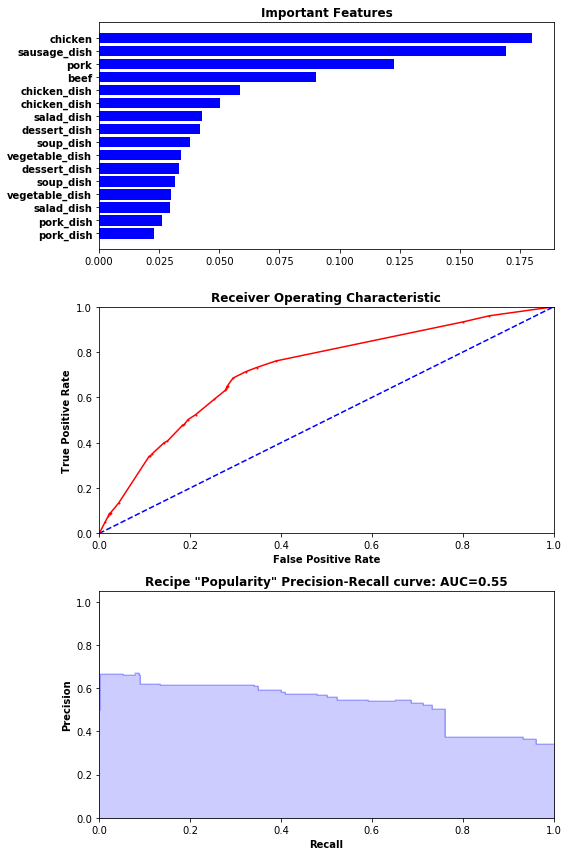

In [231]:
# features = mod4.feature_importances_
indices = np.argsort(features)
sorted_features = features[indices]
y_pos = np.arange(len(sorted_features))
labels = working.columns
sorted_labels = labels[indices]
fig, ax = plt.subplots(3, 1, figsize=(8, 12))
ax[0].barh(y_pos, sorted_features, color='b')
ax[0].set_yticks(y_pos)
ax[0].set_yticklabels(sorted_labels, fontsize=10, fontweight='bold')
ax[0].set_title('Important Features', fontweight='bold')
preds = y_pred[:, 1]
fpr, tpr, _ = roc_curve(y_test, preds)
ax[1].scatter(x=fpr, y=tpr, s=1, c='r')
ax[1].plot([0, 1], [0, 1], '--', c='b')
ax[1].plot(fpr, tpr, '-', c='r')
ax[1].set_ylim(0, 1)
ax[1].set_xlim(0, 1)
ax[1].set_xlabel('False Positive Rate', fontsize=10, fontweight='bold')
ax[1].set_ylabel('True Positive Rate', fontsize=10, fontweight='bold')
ax[1].set_title('Receiver Operating Characteristic', fontweight='bold')
ax[2].step(recall, precision, color='b', alpha=0.2, where='post')
ax[2].fill_between(recall, precision, step='post', alpha=0.2, color='b')
ax[2].set_xlabel('Recall', fontsize=10, fontweight='bold')
ax[2].set_ylabel('Precision', fontsize=10, fontweight='bold')
ax[2].set_ylim([0.0, 1.05])
ax[2].set_xlim([0.0, 1.0])
ax[2].set_title('Recipe "Popularity" Precision-Recall curve: AUC={0:0.2f}'.format(average_precision), fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.savefig('data/classifier_analysis.png')
plt.show()

## Linear modeling of data

In [234]:
from sklearn.model_selection import train_test_split

In [94]:
from sklearn.ensemble import GradientBoostingRegressor

In [99]:
working_linear = df2[['label','rating', 'beef', 'chicken', 'pork','beef_nmf', 'chicken_nmf', 'chocolate_cake_nmf', 'pork_nmf', 'potatoes_nmf', 'salad_nmf', 'soup_nmf']]

In [101]:
import numpy as np
def log_transform(col):
    return np.log(col + 0.1)
working_linear['log_rating'] = working_linear['rating'].apply(log_transform)

/Applications/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [103]:
y_straight = working_linear.pop('rating')

In [104]:
y_log = working_linear.pop('log_rating')

In [117]:
del working_linear['label']
X2 = working_linear.values

In [118]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X2, y_straight, random_state=13 ) 

In [119]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y_log, random_state=13 ) 

In [131]:
gbr = GradientBoostingRegressor(loss='huber', n_estimators=400,learning_rate=0.01, verbose=1)

In [132]:
straight = gbr.fit(X1_train, y1_train)

      Iter       Train Loss   Remaining Time 
         1       36265.5989            2.34s
         2       36148.9510            2.48s
         3       36034.1243            2.68s
         4       35921.0889            2.86s
         5       35811.4279            2.88s
         6       35706.0590            2.81s
         7       35598.0686            2.87s
         8       35493.2782            2.83s
         9       35392.6906            2.77s
        10       35289.4946            2.71s
        20       34433.0510            2.35s
        30       33763.4605            2.23s
        40       33067.8402            2.14s
        50       32489.3969            2.06s
        60       32001.9483            1.98s
        70       31625.0426            1.92s
        80       31248.6966            1.85s
        90       30916.9190            1.80s
       100       30624.4312            1.75s
       200       29059.0310            1.14s
       300       28662.9378            0.56s
       40

In [133]:
straight.score(X1_test, y1_test)

-0.011129692239035371

In [134]:
straight.feature_importances_

array([ 0.15002354,  0.18851563,  0.11458037,  0.03775283,  0.07970933,
        0.05954676,  0.02549452,  0.11774253,  0.089794  ,  0.1368405 ])

In [135]:
log_mod = gbr.fit(X2_train, y2_train)

      Iter       Train Loss   Remaining Time 
         1           2.7824            2.63s
         2           2.7760            2.51s
         3           2.7704            2.65s
         4           2.7648            2.84s
         5           2.7592            2.83s
         6           2.7538            2.73s
         7           2.7478            2.80s
         8           2.7420            2.78s
         9           2.7370            2.70s
        10           2.7320            2.63s
        20           2.6833            2.21s
        30           2.6436            2.09s
        40           2.6101            2.06s
        50           2.5823            2.02s
        60           2.5590            1.96s
        70           2.5385            1.86s
        80           2.5215            1.80s
        90           2.5067            1.77s
       100           2.4942            1.70s
       200           2.4314            1.14s
       300           2.4141            0.59s
       40

In [136]:
log_mod.score(X2_test, y2_test)

0.15286037596425794

In [137]:
log_mod.feature_importances_

array([ 0.14491739,  0.18879513,  0.11216608,  0.01500197,  0.10301019,
        0.05907498,  0.02522444,  0.12154799,  0.09200277,  0.13825906])

In [127]:
working_linear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9714
Data columns (total 10 columns):
beef                  9233 non-null uint8
chicken               9233 non-null uint8
pork                  9233 non-null uint8
beef_nmf              9233 non-null uint8
chicken_nmf           9233 non-null uint8
chocolate_cake_nmf    9233 non-null uint8
pork_nmf              9233 non-null uint8
potatoes_nmf          9233 non-null uint8
salad_nmf             9233 non-null uint8
soup_nmf              9233 non-null uint8
dtypes: uint8(10)
memory usage: 482.3 KB


# Distribution of # likes

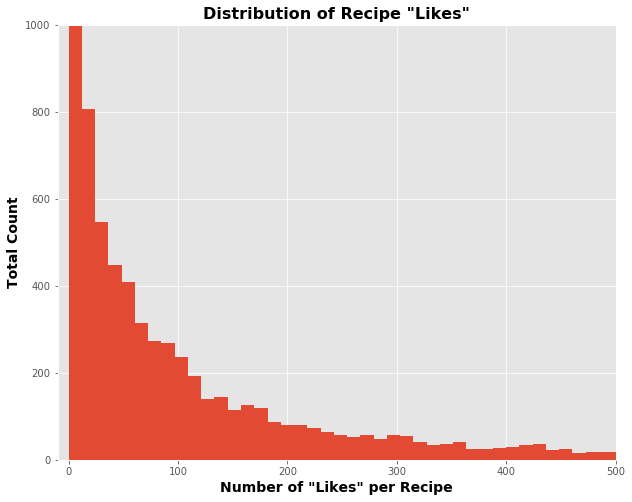

In [150]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(df2['rating'], bins=1000)
ax.set_ylim([0, 1000])
ax.set_xlim([-10, 500])
ax.set_title('Distribution of Recipe "Likes"', fontsize=16, weight='bold', color='k')
ax.set_xlabel('Number of "Likes" per Recipe', fontsize=14, weight='bold', color='k')
ax.set_ylabel('Total Count', fontsize=14, weight='bold', color='k')
# plt.savefig('data/distribution.png')

In [151]:
beef = df2['rating'].where(df2['category'] == 'beef')

In [152]:
beef.dropna(inplace=True)

In [153]:
beef_df = pd.DataFrame(beef)
beef_df.reset_index(inplace=True)

In [154]:
chicken = df2['rating'].where(df2['category'] == 'chicken')

In [155]:
chicken.dropna(inplace=True)

In [156]:
pork = df2['rating'].where(df2['category'] == 'pork')

In [157]:
pork.dropna(inplace=True)

In [158]:
other = df2['rating'].where(df2['category'].isnull())

In [159]:
other.dropna(inplace=True)

In [160]:
chicken_df = pd.DataFrame(chicken)
chicken_df.reset_index(inplace=True)
pork_df = pd.DataFrame(pork)
pork_df.reset_index(inplace=True)
other_df = pd.DataFrame(other)
other_df.reset_index(inplace=True)

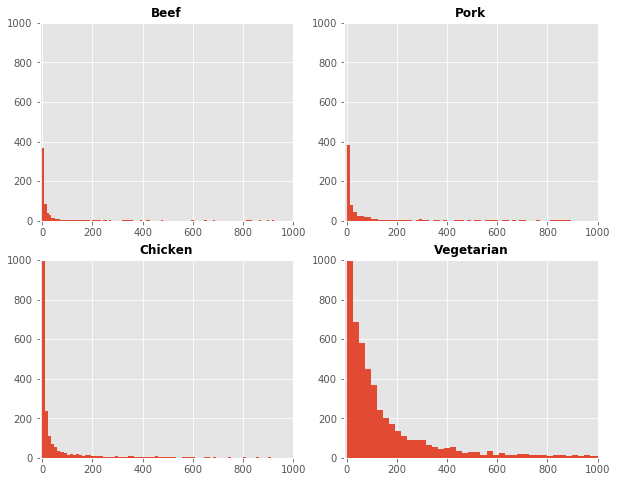

In [161]:
fig, axs = plt.subplots(2,2, figsize=(10,8))
recipes = [beef_df, chicken_df, pork_df, other_df]
titles = ['Beef', 'Chicken', 'Pork', 'Vegetarian']
for idx, ax in enumerate(axs):
    ax[0].hist(recipes[idx]['rating'], bins=500)
    ax[1].hist(recipes[idx + 2]['rating'], bins=500)
    ax[0].set_ylim([0, 1000])
    ax[1].set_ylim([0, 1000])
    ax[0].set_xlim([-10, 1000])
    ax[1].set_xlim([-10, 1000])
    ax[0].set_title(titles[idx], fontsize=12, weight='bold', color='k')
    ax[1].set_title(titles[idx+2], fontsize=12, weight='bold', color='k')
#     ax[idx].set_xlabel('Number of "Likes" per Recipe', fontsize=14, weight='bold', color='k')
#     ax[idx].set_ylabel('Total Count', fontsize=14, weight='bold', color='k')
#     plt.tight_layout()
#     plt.savefig('data/distribution_ingredients.png')

($\lambda = 1$) &nbsp;&nbsp;
$pmf = \frac{\lambda^ke^{-\lambda}}{k!}$